In [1]:
import pandas as pd

In [2]:
file_folder = '../results/wave_cluster'
import os
files = os.listdir(file_folder)
files.sort()
table_summary = []
for speed in [15]:
# for speed in [1,5,10,15,20,25,30,35,40]:
    for file in ['2022-11-22']:
        for lane_file in ['lane_1']:
            lane_number = int(lane_file.split('_')[-1])
            data = pd.read_csv(file_folder + '/' + file + '/' + lane_file + f'/CC_{speed}.csv')
            num_cc = len(data.c_id.unique())
            table_summary.append([speed,file,lane_number,num_cc])
    #         break
    #     break
    # break
files

['2022-11-22']

In [3]:
table_summary = pd.DataFrame(table_summary,columns=['speed','file','lane','num_cc'])
table_summary.groupby(['file','speed','lane']).num_cc.mean()

file        speed  lane
2022-11-22  15     1       61.0
Name: num_cc, dtype: float64

In [4]:
for cc_id in data.c_id.unique():
    cc_data = data[data.c_id==cc_id]
    if len(cc_data.trace_id_front.unique()) != len(cc_data.trace_id_tail.unique()):
        print('check')
        print(cc_id)
        break

check
9


In [5]:
for cc_id in data.c_id.unique():
    cc_id = 9
    cc_data = data[data.c_id==cc_id]
    break

In [6]:
print(cc_data.trace_id_front.unique())
print(cc_data.trace_id_tail.unique())

[24 26 47 50]
[24 47 50]


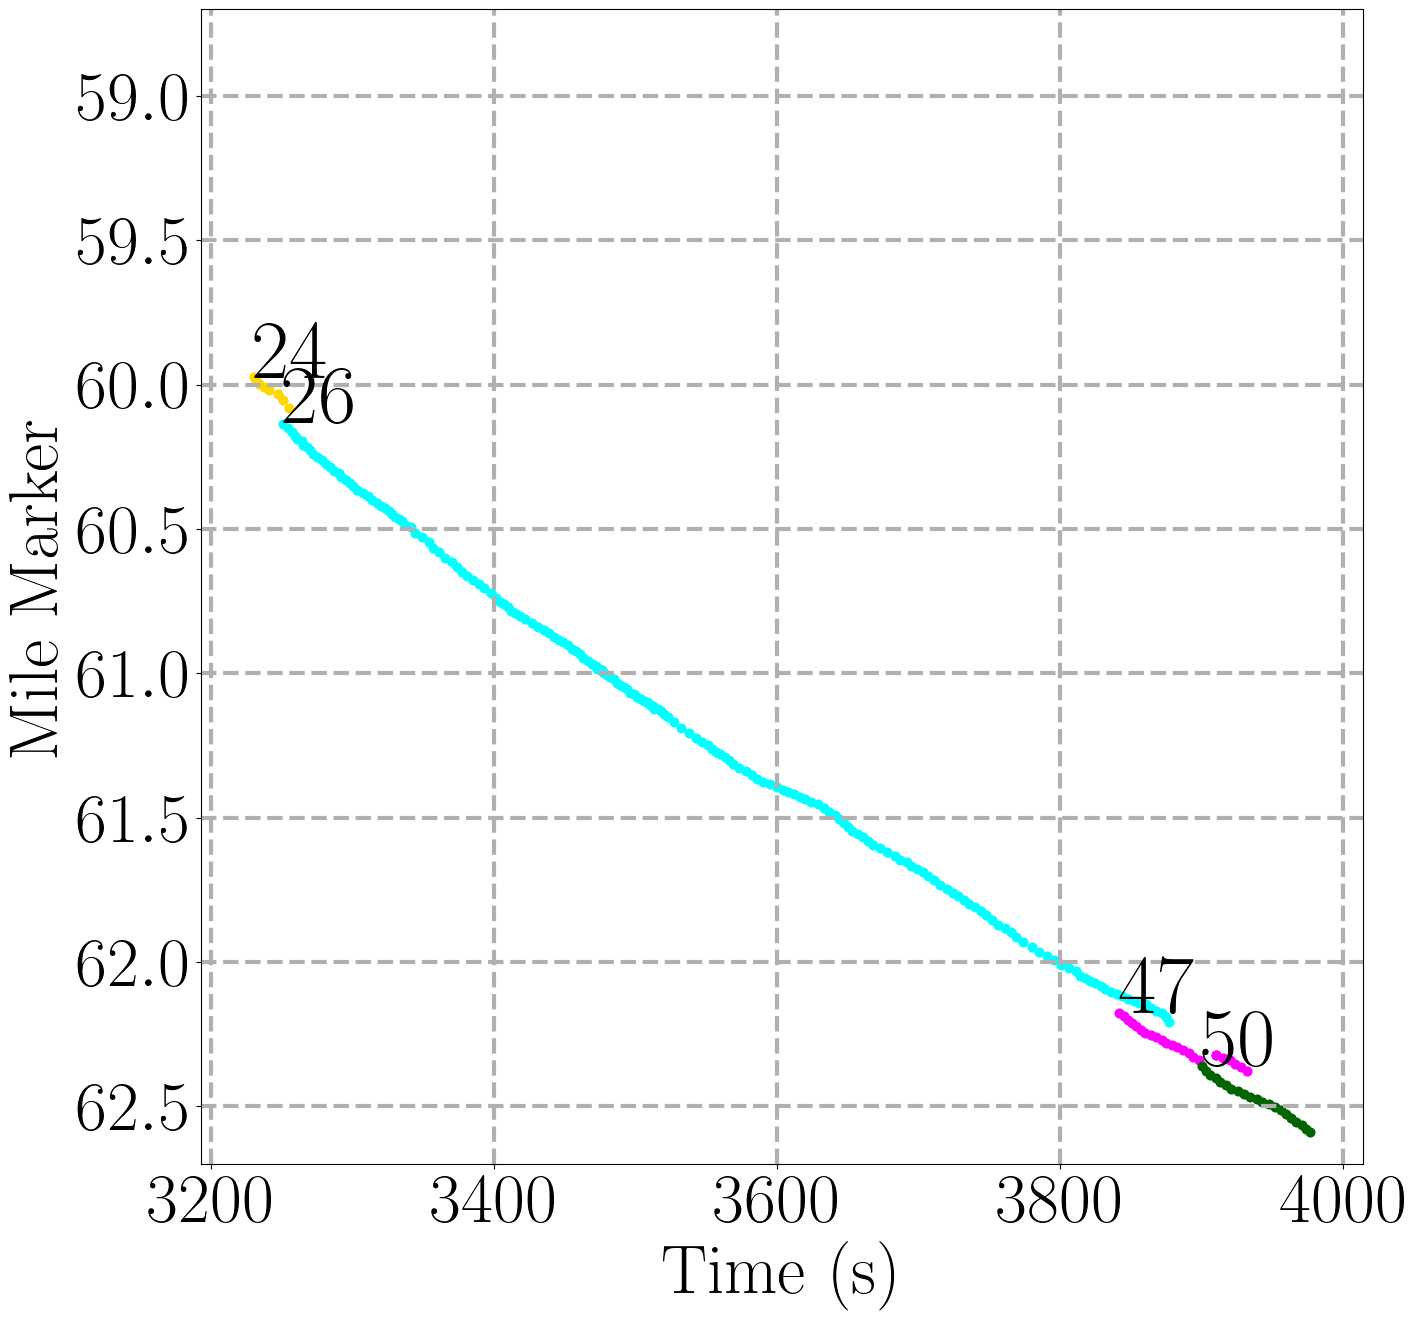

In [7]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 50
plt.figure(figsize=(15,15))
from mycolor import get_colors
fronts = cc_data['trace_id_front'].unique()
for front in fronts:
    random_color = get_colors(front)
    front_data = cc_data[cc_data.trace_id_front==front]
    plt.scatter(front_data.time_front,front_data.space_front,c=random_color)
    plt.text(front_data.time_front.iloc[0],front_data.space_front.iloc[0],str(front),fontsize=60)
plt.ylim(58.7,62.7)
plt.gca().invert_yaxis()
plt.ylabel('Mile Marker')
plt.xlabel('Time (s)')
# plt.xlim(2300,3400)
plt.grid('on',linestyle='--',lw=3)
plt.savefig('../figures/cc_front.pdf',bbox_inches='tight',dpi=300)
plt.show()

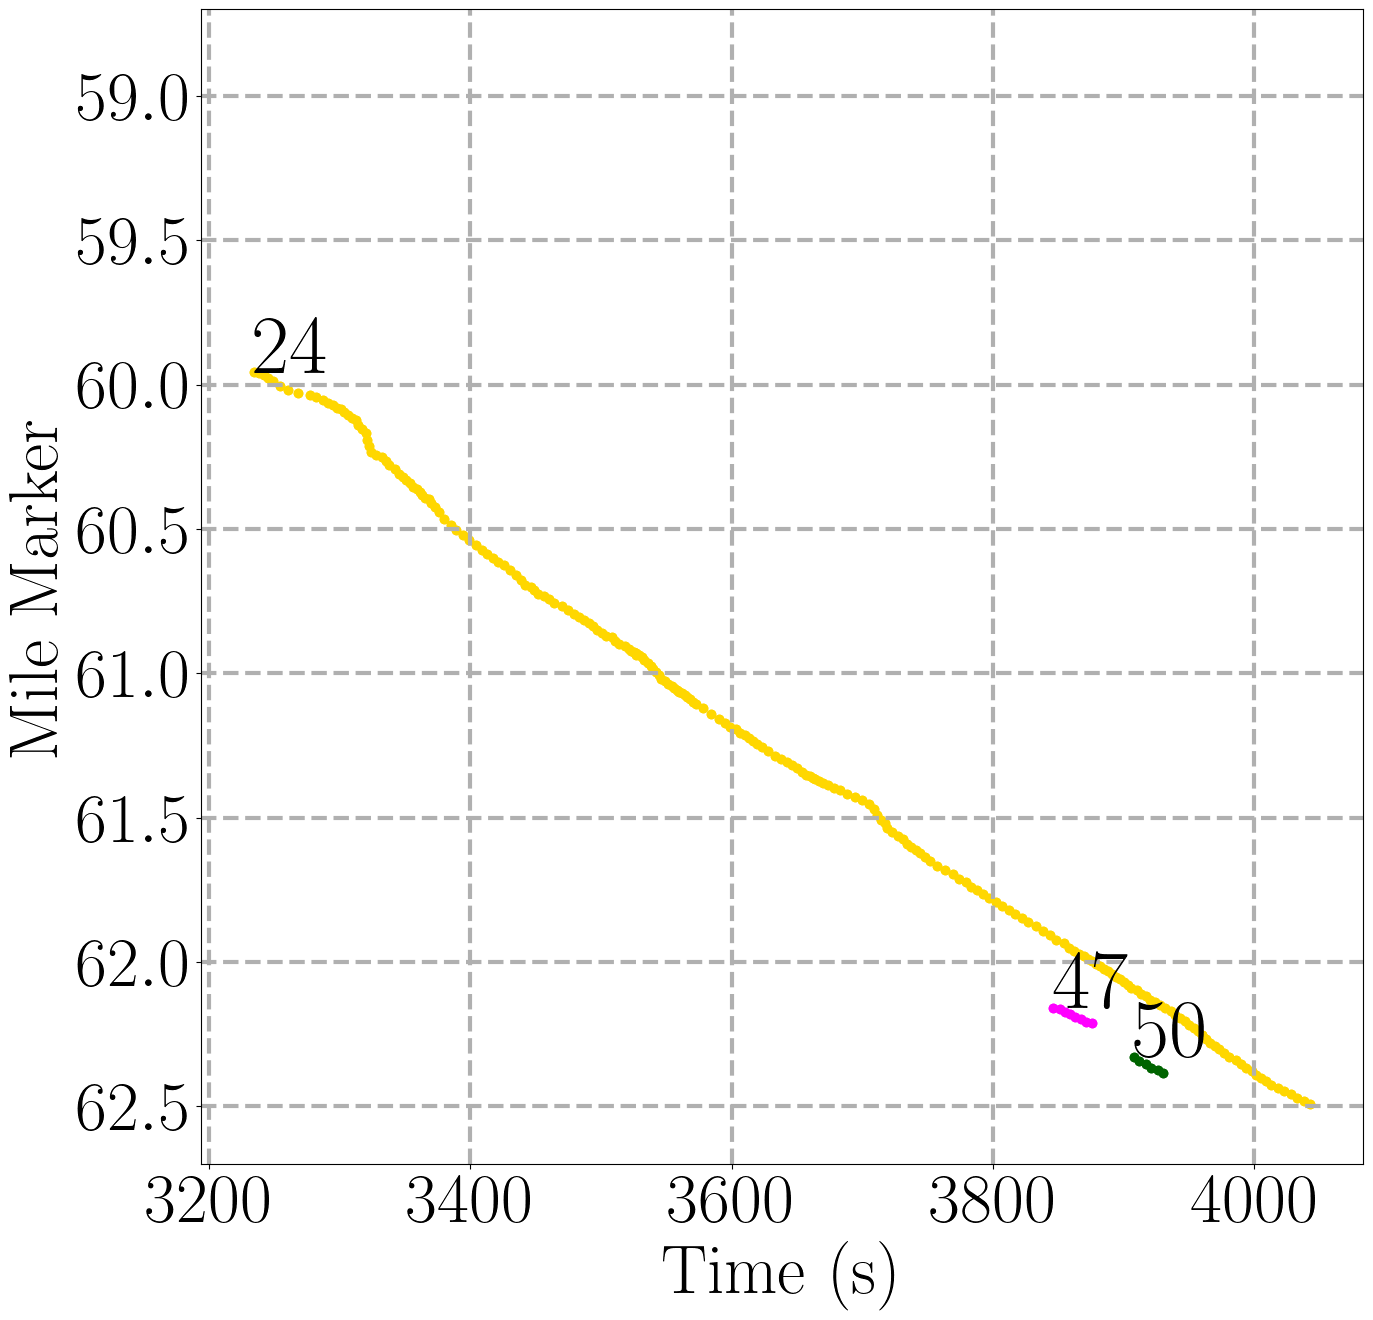

In [8]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 50
plt.figure(figsize=(15,15))
from mycolor import get_colors
tails = cc_data['trace_id_tail'].unique()
for tail in tails:
    random_color = get_colors(tail)
    tail_data = cc_data[cc_data.trace_id_tail==tail]
    plt.scatter(tail_data.time_tail,tail_data.space_tail,c=random_color)
    plt.text(tail_data.time_tail.iloc[0],tail_data.space_tail.iloc[0],str(tail),fontsize=60)
plt.ylim(58.7,62.7)
# plt.xlim(2300,3400)
plt.gca().invert_yaxis()
plt.ylabel('Mile Marker')
plt.xlabel('Time (s)')
plt.grid('on',linestyle='--',lw=3)
plt.savefig('../figures/cc_tail.pdf',bbox_inches='tight',dpi=300)
plt.show()

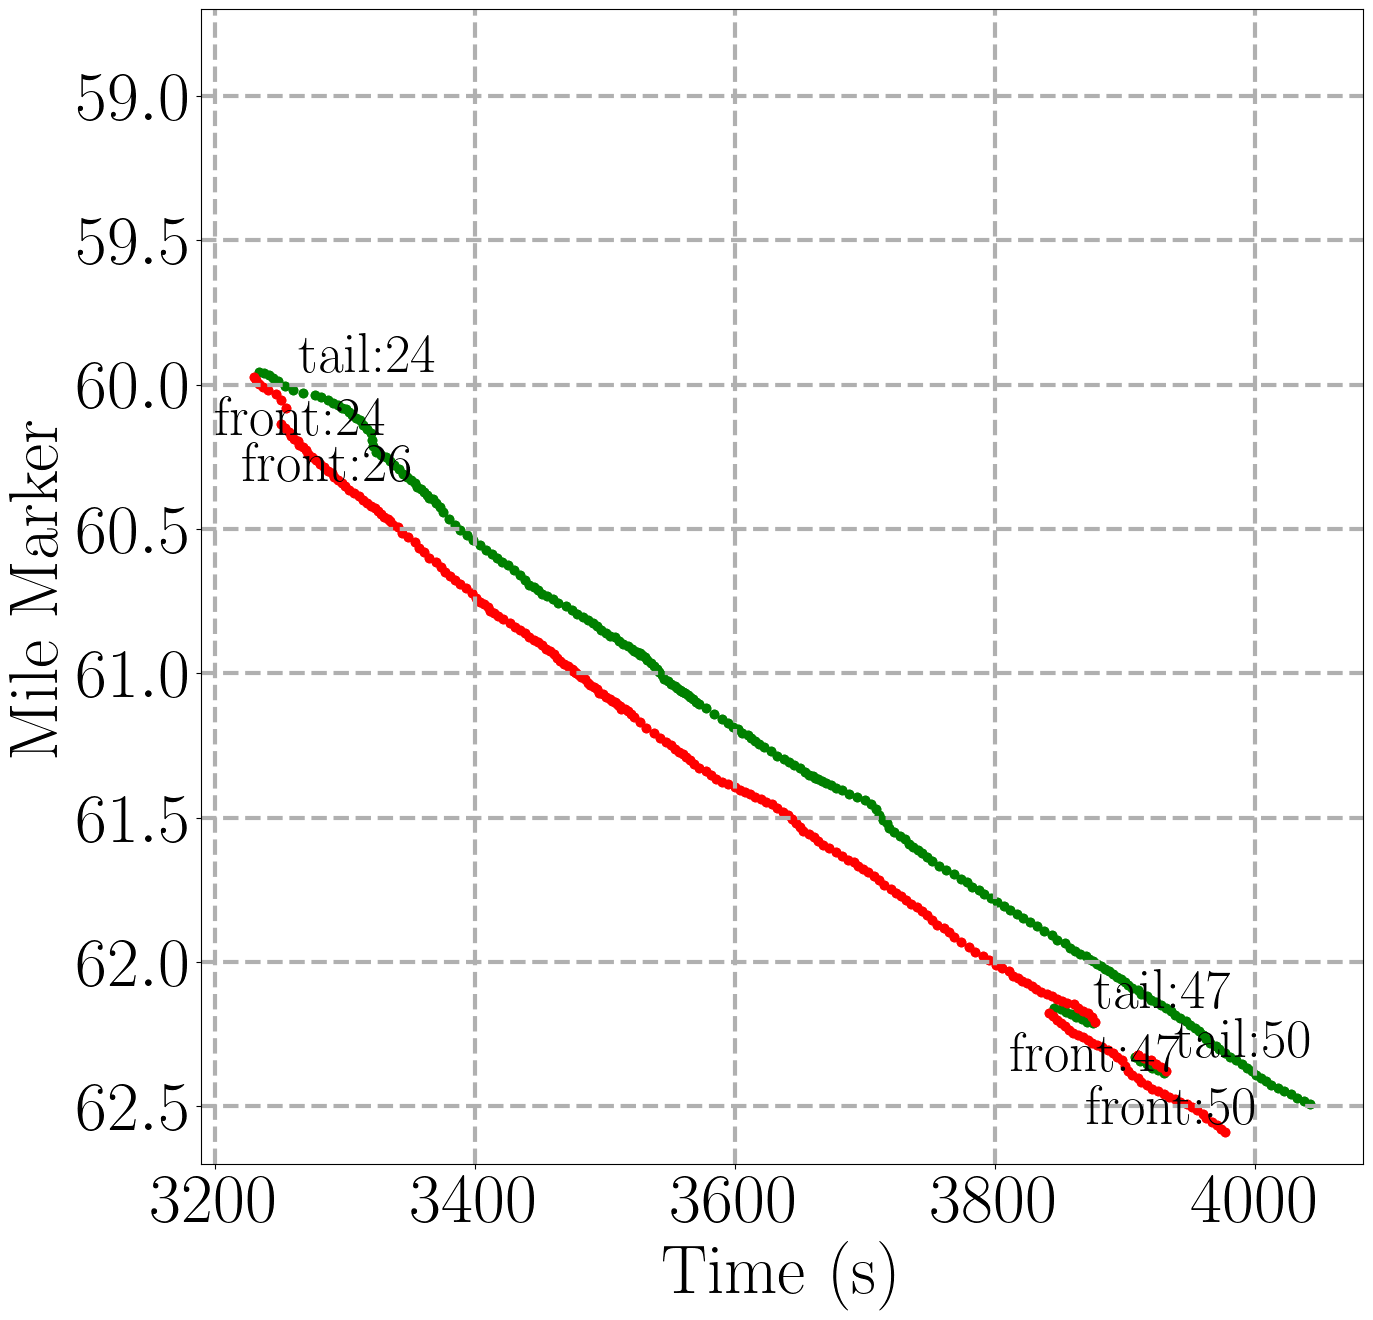

In [9]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 50
plt.figure(figsize=(15,15))
from mycolor import get_colors
tails = cc_data['trace_id_tail'].unique()
for tail in tails:
    random_color = get_colors(tail)
    tail_data = cc_data[cc_data.trace_id_tail==tail]
    plt.scatter(tail_data.time_tail,tail_data.space_tail,c='green')
    plt.text(tail_data.time_tail.iloc[0] + 30,tail_data.space_tail.iloc[0],f"tail:{tail}",fontsize=40)
fronts = cc_data['trace_id_front'].unique()
for front in fronts:
    random_color = get_colors(front)
    front_data = cc_data[cc_data.trace_id_front==front]
    plt.scatter(front_data.time_front,front_data.space_front,c='red')
    plt.text(front_data.time_front.iloc[0] - 30,front_data.space_front.iloc[0]+0.2,f"front:{front}",fontsize=40)
plt.ylim(58.7,62.7)
# plt.xlim(2300,3400)
plt.gca().invert_yaxis()
plt.ylabel('Mile Marker')
plt.xlabel('Time (s)')
plt.grid('on',linestyle='--',lw=3)
plt.savefig('../figures/cc.pdf',bbox_inches='tight',dpi=300)
plt.show()

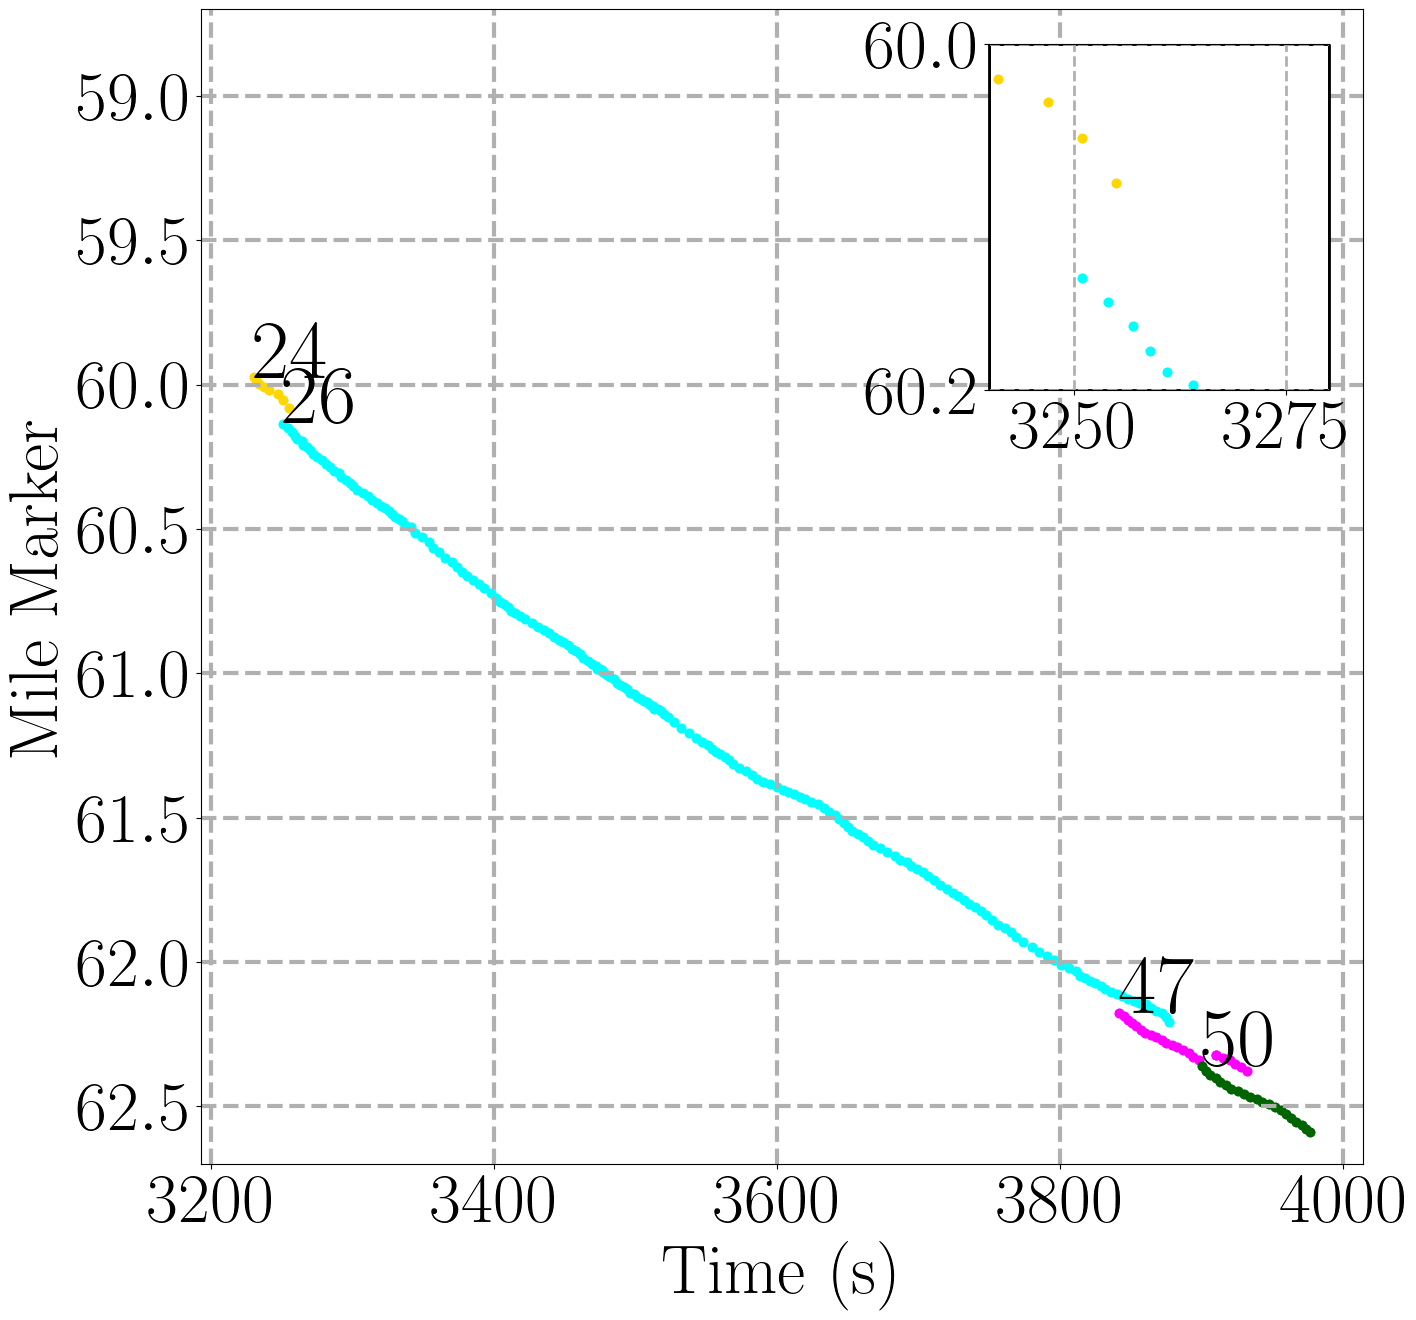

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 50
plt.figure(figsize=(15,15))

from mycolor import get_colors

fronts = cc_data['trace_id_front'].unique()
for front in fronts:
    random_color = get_colors(front)
    front_data = cc_data[cc_data.trace_id_front==front]
    plt.scatter(front_data.time_front, front_data.space_front, c=random_color)
    plt.text(front_data.time_front.iloc[0], front_data.space_front.iloc[0],
             str(front), fontsize=60)

plt.ylim(58.7, 62.7)
plt.gca().invert_yaxis()
plt.ylabel('Mile Marker')
plt.xlabel('Time (s)')
plt.grid('on', linestyle='--', lw=3)

# --- Create zoomed inset axis ---
ax_inset = zoomed_inset_axes(plt.gca(), zoom=6, loc='upper right')  
# zoom = how much magnification, loc = where inset sits

# Plot same data inside inset
for front in fronts:
    random_color = get_colors(front)
    front_data = cc_data[cc_data.trace_id_front==front]
    ax_inset.scatter(front_data.time_front, front_data.space_front, c=random_color)

# Set zoom region
ax_inset.set_xlim(3240, 3280)
ax_inset.set_ylim(60.0, 60.2)
ax_inset.invert_yaxis()
ax_inset.grid('on', linestyle='--', lw=2)

# --- Draw box & connector lines ---
mark_inset(plt.gca(), ax_inset, loc1=2, loc2=4, fc="none", ec="k", lw=2)

plt.savefig('../figures/cc_front_with_zoom_box.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [66]:
import pandas as pd
file_folder = '/Users/junyi/Work/Research/2024P001_SAG/wave_cluster'
import os
files = os.listdir(file_folder)
files.sort()
table_summary = []
for speed in [15]:
# for speed in [1,5,10,15,20,25,30,35,40]:
    for file in ['2022-11-22']:
        print(file)
        for lane_file in ['lane_1']:
            print(lane_file)
            lane_number = int(lane_file.split('_')[-1])
            data = pd.read_csv(file_folder + '/' + file + '/' + lane_file + f'/CC_{speed}.csv')
            num_cc = len(data.c_id.unique())
            table_summary.append([speed,file,lane_number,num_cc])

2022-11-22
lane_1


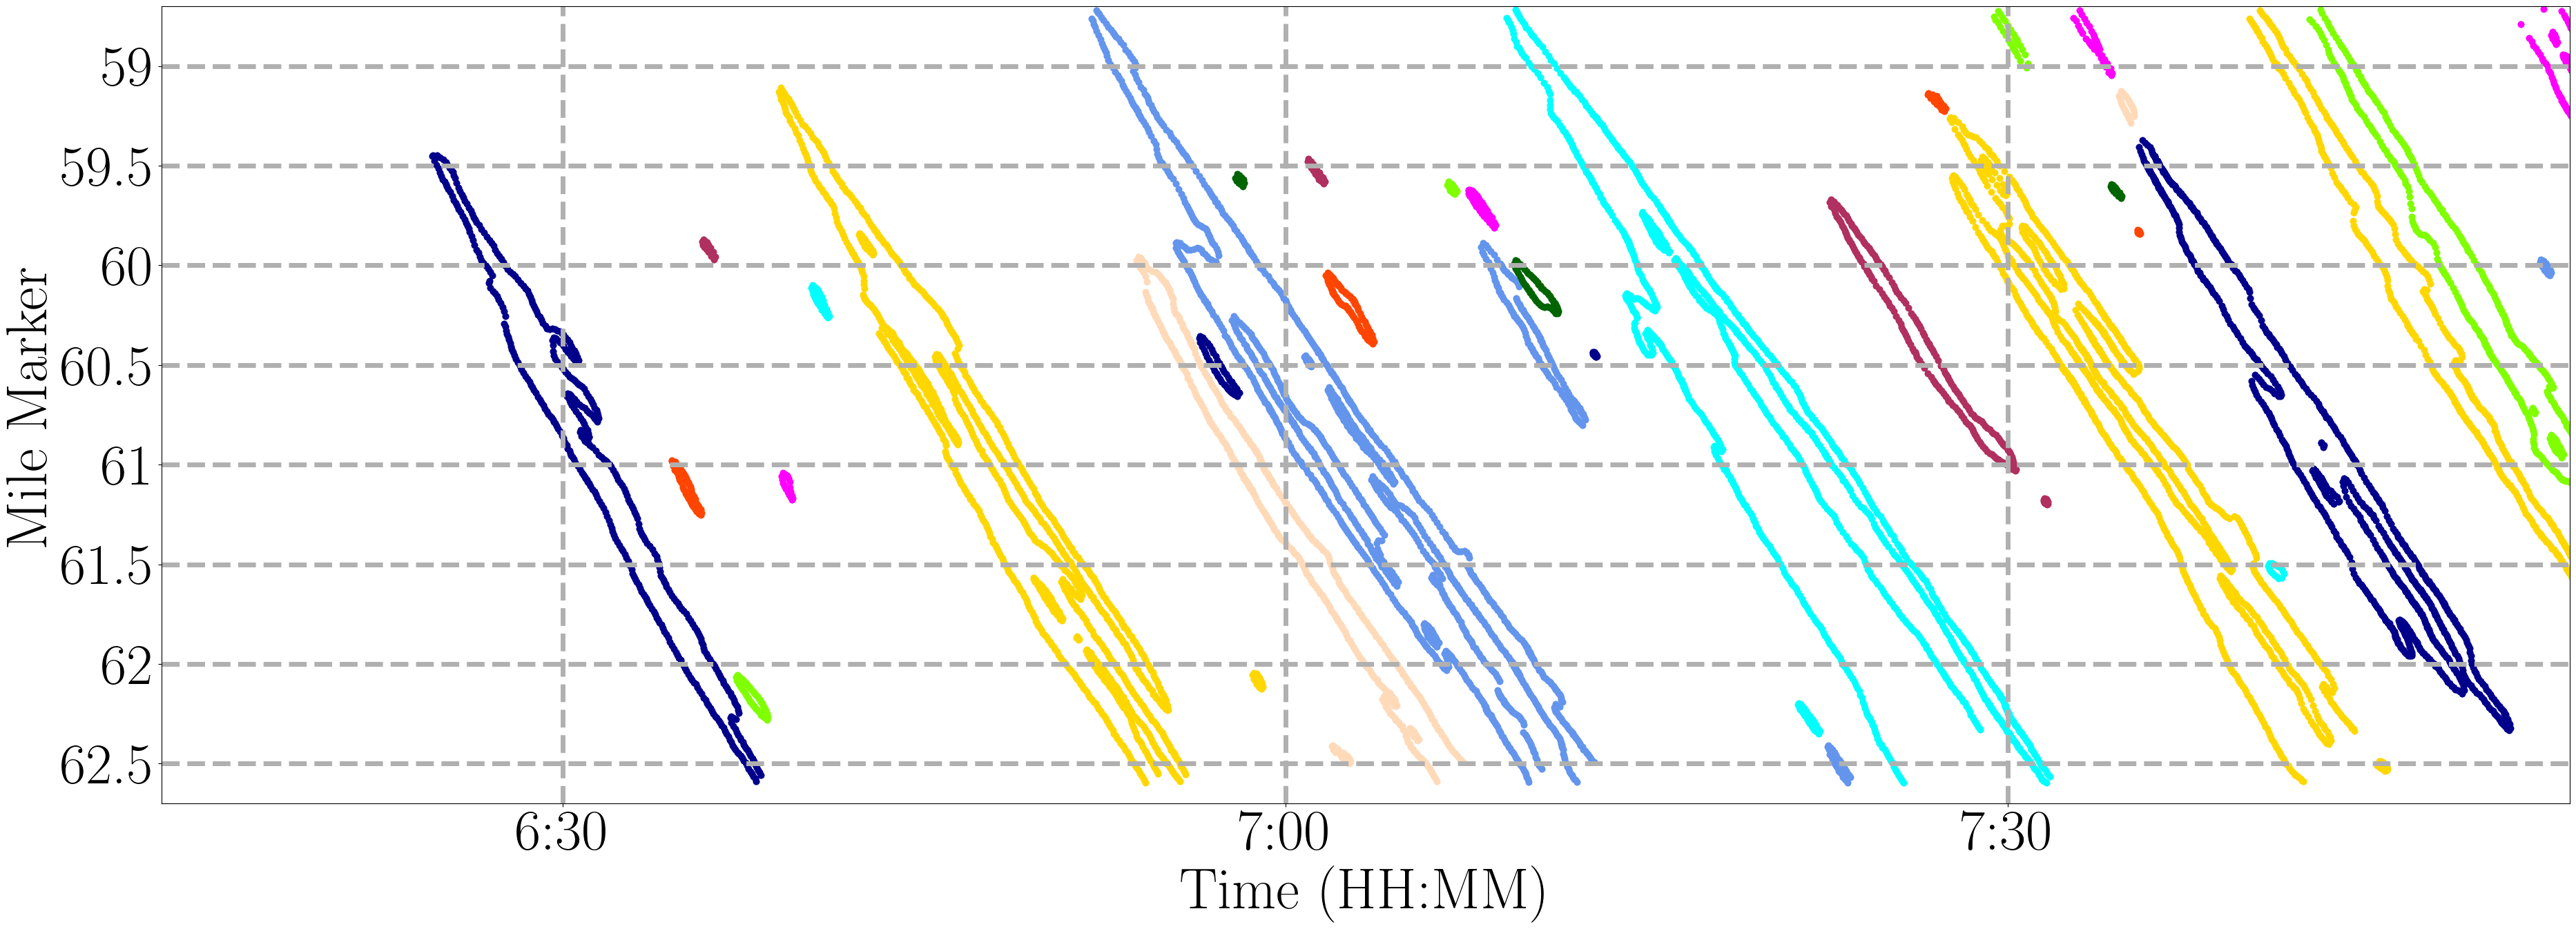

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 60
plt.figure(figsize=(45, 15))
cc_id = data.c_id.unique()
for cc in cc_id[:38]:
    random_color = get_colors(cc)
    cc_data = data[data.c_id==cc]
    plt.scatter(cc_data.time_front,cc_data.space_front,c=random_color)
    plt.scatter(cc_data.time_tail,cc_data.space_tail,c=random_color)
    # plt.text(cc_data.time_front.iloc[0]-50,cc_data.space_front.iloc[0],str(cc),fontsize=60)
plt.xticks(np.arange(0, 14401, 1800), ['6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00'])
plt.ylim(62.7,58.7)
plt.yticks([59,59.5,60,60.5,61,61.5,62,62.5], ['59','59.5','60', '60.5', '61', '61.5', '62', '62.5'])
plt.xlim(800, 6800)
plt.grid('on',linestyle='--',lw=5)
plt.xlabel('Time (HH:MM)')
plt.ylabel('Mile Marker')
plt.savefig('cc_intro.pdf',bbox_inches='tight',dpi=300)
plt.show()

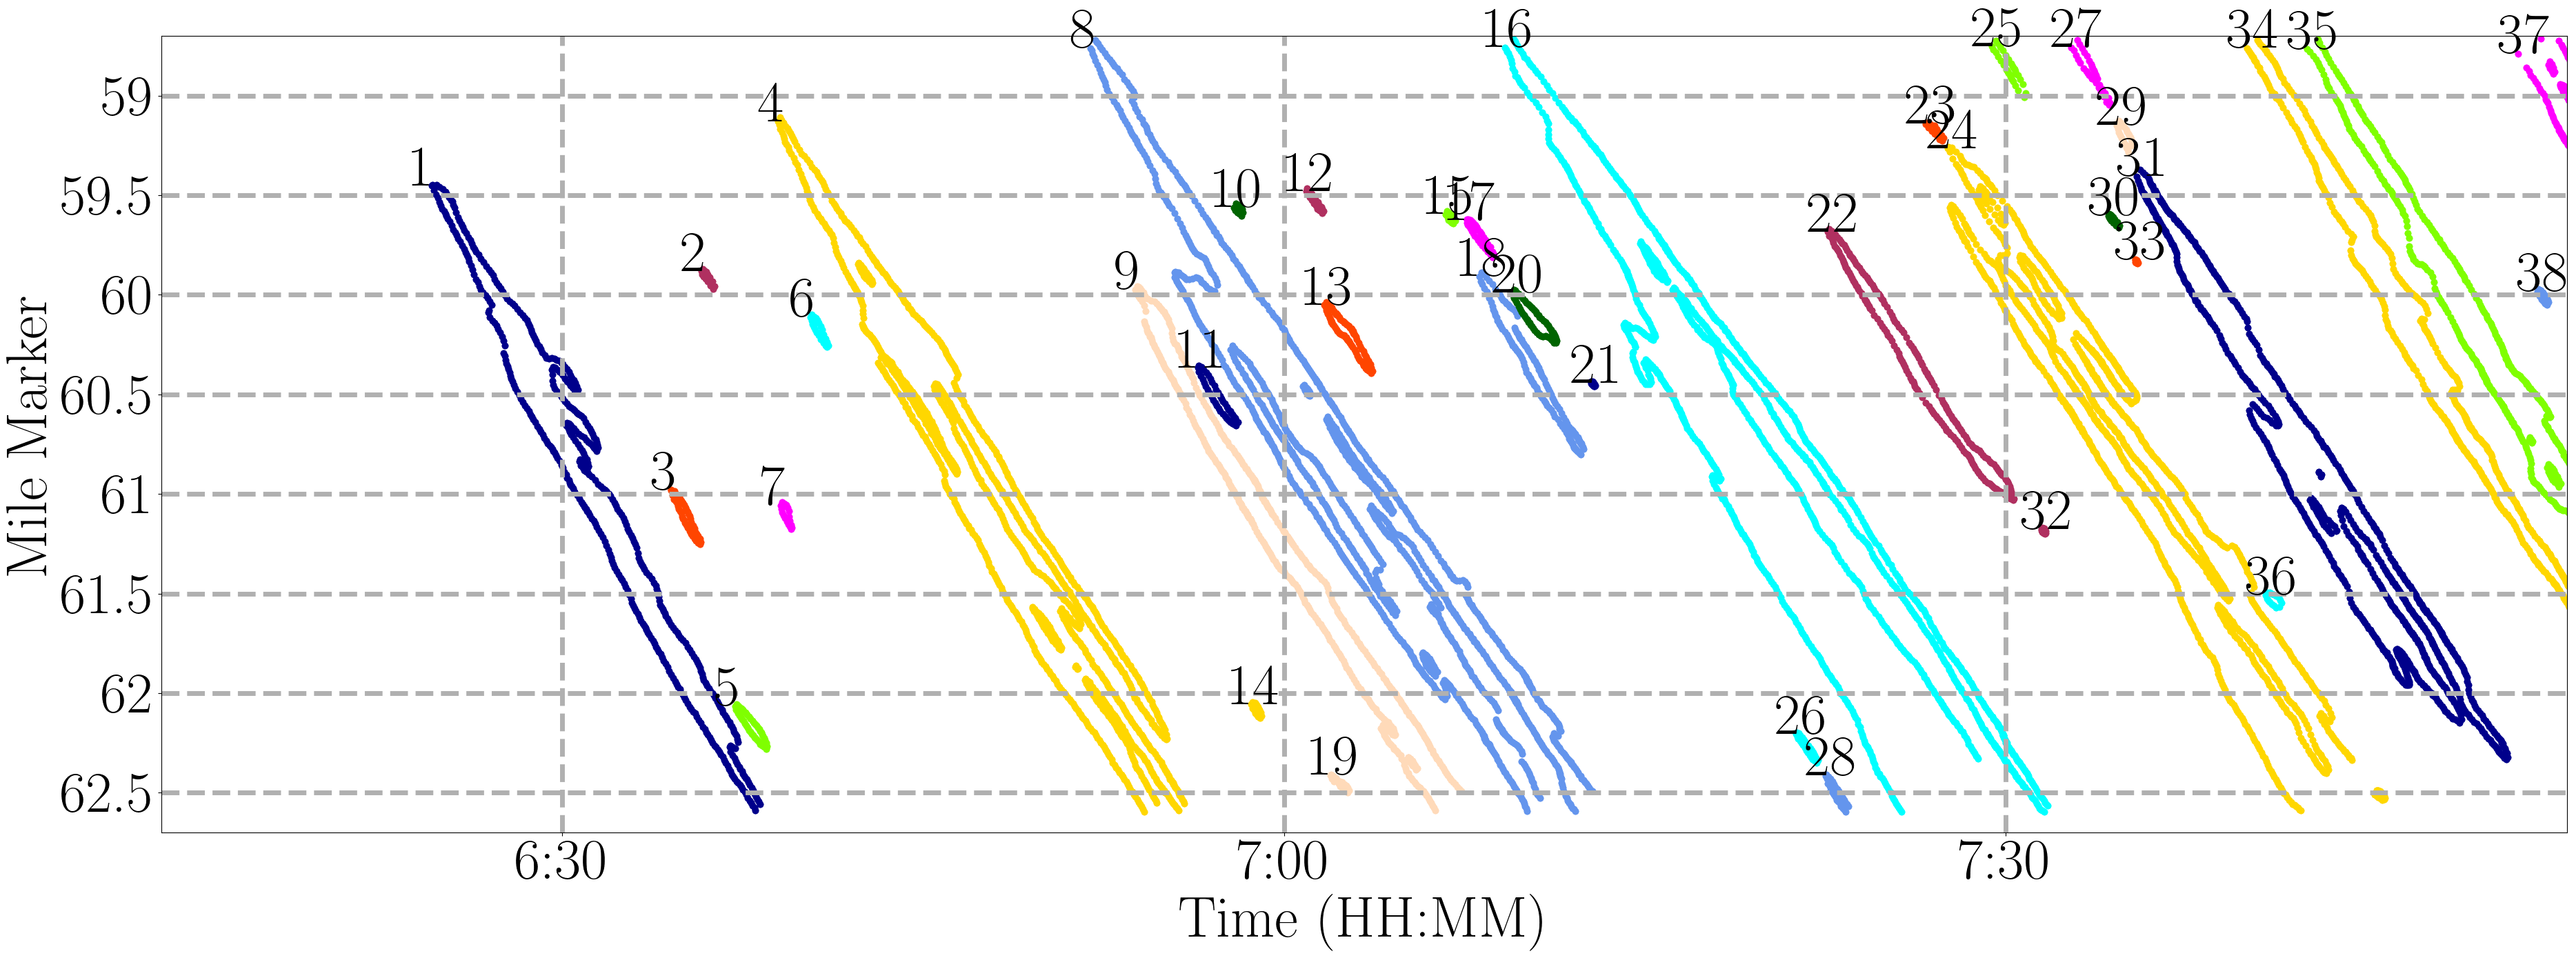

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 60
plt.figure(figsize=(45, 15))
cc_id = data.c_id.unique()
for cc in cc_id[:38]:
    random_color = get_colors(cc)
    cc_data = data[data.c_id==cc]
    plt.scatter(cc_data.time_front,cc_data.space_front,c=random_color)
    plt.scatter(cc_data.time_tail,cc_data.space_tail,c=random_color)
    plt.text(cc_data.time_front.iloc[0]-50,cc_data.space_front.iloc[0],str(cc),fontsize=60)
plt.xticks(np.arange(0, 14401, 1800), ['6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00'])
plt.ylim(62.7,58.7)
plt.yticks([59,59.5,60,60.5,61,61.5,62,62.5], ['59','59.5','60', '60.5', '61', '61.5', '62', '62.5'])
plt.xlim(800, 6800)
plt.grid('on',linestyle='--',lw=5)
plt.xlabel('Time (HH:MM)')
plt.ylabel('Mile Marker')
plt.savefig('cc_intro_15.pdf',bbox_inches='tight',dpi=300)
plt.show()

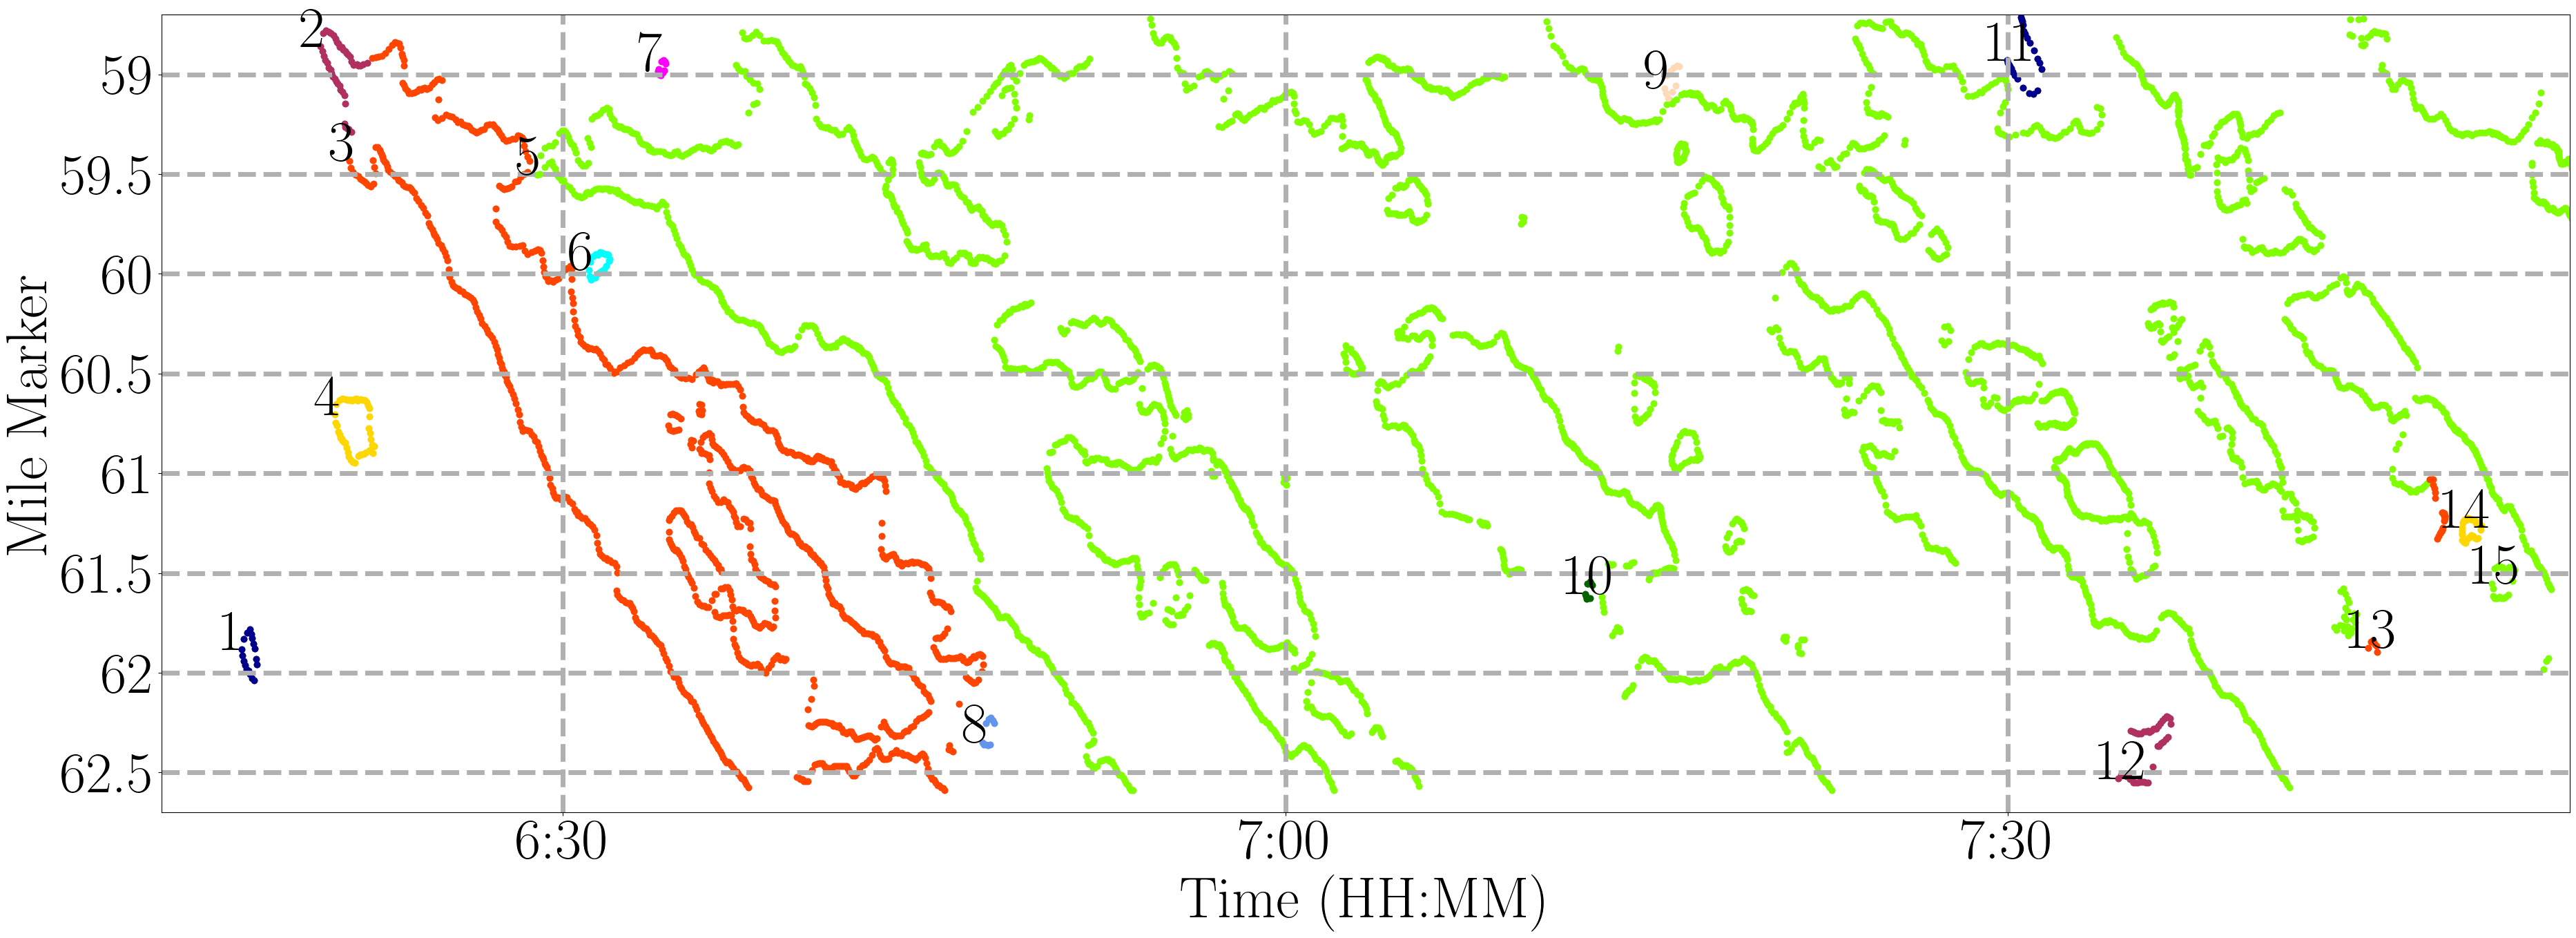

In [63]:
file_folder = '/Users/junyi/Work/Research/2024P001_SAG/wave_cluster'
import os
files = os.listdir(file_folder)
files.sort()
table_summary = []
for speed in [40]:
# for speed in [1,5,10,15,20,25,30,35,40]:
    for file in ['2022-11-22']:
        for lane_file in ['lane_1']:
            lane_number = int(lane_file.split('_')[-1])
            data = pd.read_csv(file_folder + '/' + file + '/' + lane_file + f'/CC_{speed}.csv')
            num_cc = len(data.c_id.unique())
            table_summary.append([speed,file,lane_number,num_cc])
    #         break
    #     break
    # break
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 60
plt.figure(figsize=(45, 15))
cc_id = data.c_id.unique()
for cc in cc_id[:15]:
    random_color = get_colors(cc)
    cc_data = data[data.c_id==cc]
    plt.scatter(cc_data.time_front,cc_data.space_front,c=random_color)
    plt.scatter(cc_data.time_tail,cc_data.space_tail,c=random_color)
    plt.text(cc_data.time_front.iloc[0]-50,cc_data.space_front.iloc[0],str(cc),fontsize=60)
plt.xticks(np.arange(0, 14401, 1800), ['6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00'])
plt.ylim(62.7,58.7)
plt.yticks([59,59.5,60,60.5,61,61.5,62,62.5], ['59','59.5','60', '60.5', '61', '61.5', '62', '62.5'])
plt.xlim(800, 6800)
plt.grid('on',linestyle='--',lw=5)
plt.xlabel('Time (HH:MM)')
plt.ylabel('Mile Marker')
plt.savefig('cc_intro_40.pdf',bbox_inches='tight',dpi=300)
plt.show()